**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Model2_FineTuning - ResNet101V2

In [ ]:
model2_FT = keras.models.load_model('/content/drive/MyDrive/Models/01_ResNet101V2_TransferLearning_Best_Model.h5')

In [ ]:
model2_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
print(len(model2_FT.layers))
print(int(0.35*(len(model2_FT.layers))))

381
133


In [ ]:
#Setting the trainable and non-trainable layers
for layer in model2_FT.layers[:int(0.35*(len(model2_FT.layers)))]:
  layer.trainable = False

for layer in model2_FT.layers[int(0.35*(len(model2_FT.layers))):]:
  layer.trainable = True

In [ ]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.10, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
26/26 [==============================] - 48s 491ms/step - loss: 0.0043 - accuracy: 0.9976 - val_loss: 2.0274 - val_accuracy: 0.7609
Epoch 2/10
26/26 [==============================] - 9s 339ms/step - loss: 0.0152 - accuracy: 0.9903 - val_loss: 55.2747 - val_accuracy: 0.1739
Epoch 3/10
26/26 [==============================] - 9s 347ms/step - loss: 0.0056 - accuracy: 0.9976 - val_loss: 65.3164 - val_accuracy: 0.4783
Epoch 4/10
26/26 [==============================] - 9s 355ms/step - loss: 0.0891 - accuracy: 0.9758 - val_loss: 6.1750 - val_accuracy: 0.5870
Epoch 5/10
26/26 [==============================] - 9s 339ms/step - loss: 0.0315 - accuracy: 0.9879 - val_loss: 2.5409 - val_accuracy: 0.5870
Epoch 6/10
26/26 [==============================] - 10s 377ms/step - loss: 0.0097 - accuracy: 0.9952 - val_loss: 0.2849 - val_accuracy: 0.9130
Epoch 7/10
26/26 [==============================] - 10s 375ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.0059 - val_accuracy: 1.0000
E

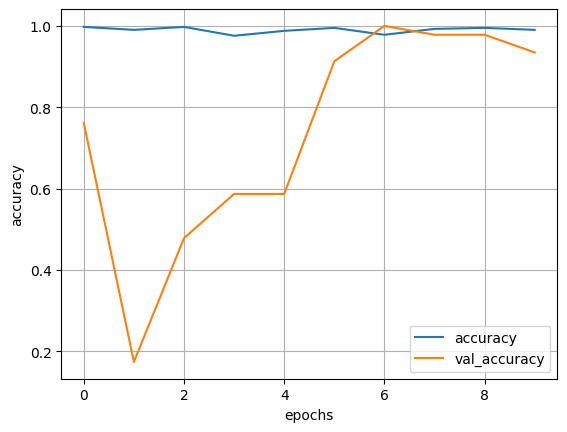

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 1s 261ms/step - loss: 0.4304 - accuracy: 0.9545
Test-loss: 0.430439, Test-accuracy: 0.954545


In [ ]:
model2_FT.load_weights("bestFT.h5")
testLoss_FineTune, testAccuracy_FineTune = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 1s 262ms/step - loss: 0.4304 - accuracy: 0.9545
Test-loss: 0.430439, Test-accuracy: 0.954545


In [ ]:
y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 3s 274ms/step
[2 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 2 0 0 1 0 1 1 0 2 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 0 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


##Confusion Matrix

In [ ]:
#Confusion Matrix for Model2_FT
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[69,  0,  0],
       [ 6, 63,  0],
       [ 1,  0, 15]])

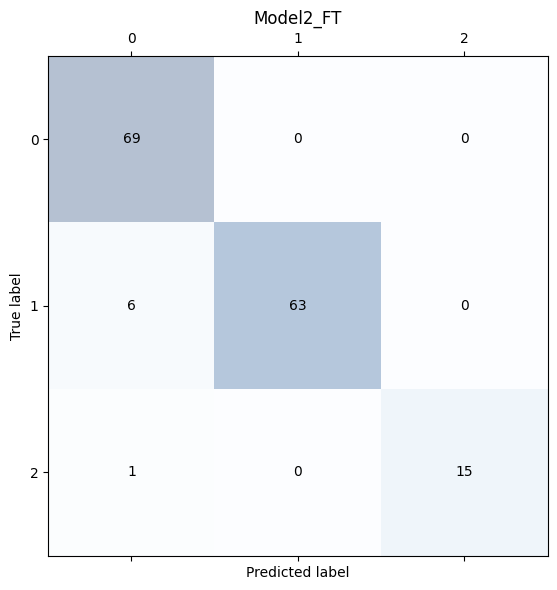

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model2_FT')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model2_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

##Precision, Recall and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9587320574162679
Recall:  0.9545454545454546
F1-score:  0.954652421094933






In [ ]:
# Saving the best model obtained
model2_FT.save('/content/drive/MyDrive/Models/02_ResNet101V2_Finetuned_Best_Model.h5')
print("Model saved as '02_ResNet101V2_FineTuned_Best_Model.h5'")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as '02_ResNet101V2_FineTuned_Best_Model.h5'
